<a href="https://colab.research.google.com/github/gselivirov/stock_ARIMA/blob/main/stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%%capture

!pip install pmdarima

In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import files

from sklearn.metrics import mean_absolute_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict

from pmdarima.arima.utils import ndiffs

import time

In [6]:
f = files.upload()

Saving GOOG.csv to GOOG.csv


In [23]:
df = pd.read_csv("GOOG.csv")
df = df.set_index("Date")
df.index = pd.DatetimeIndex(df.index).to_period('D')
df = df.resample("D").mean().fillna(method="ffill")
y = df.loc["2021", "Close"]

In [24]:
print(f"p-value: {adfuller(y)[1]}")

p-value: 0.36730986952671274


In [25]:
ndiffs(y, test="adf")

1

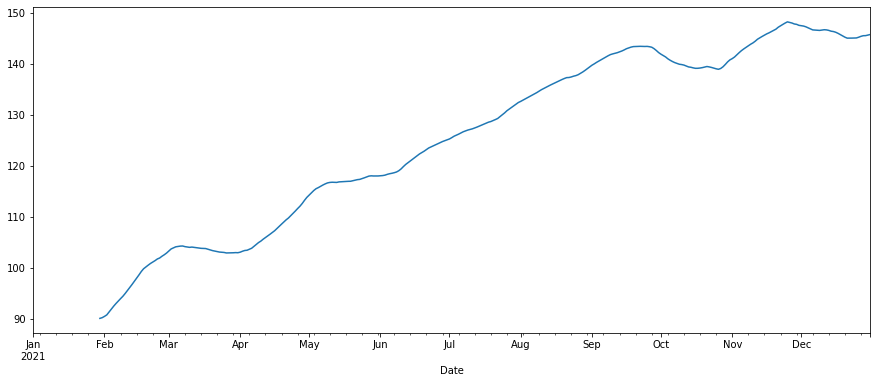

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
y.rolling(30).mean().plot(ax=ax);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


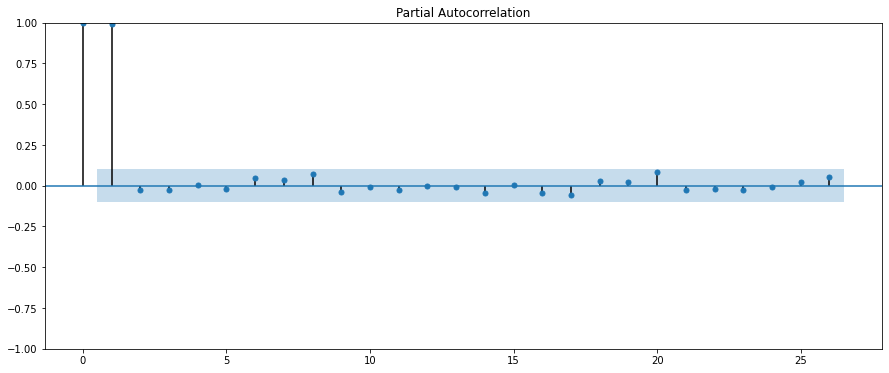

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax=ax);

In [26]:
y_train = y.iloc[:int(len(y) * 0.9)]
y_test = y.iloc[int(len(y) * 0.9):]

In [8]:
p_params = range(0, 21, 5)
q_params = range(0, 3)

In [9]:
mae_grid = dict()
for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        model = ARIMA(y_train, order=order).fit()
        print(f"Trained with {order}")
        y_pred = model.predict()
        mae = mean_absolute_error(y_train, y_pred)
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained with (0, 0, 0)
Trained with (0, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trained with (0, 0, 2)
Trained with (5, 0, 0)
Trained with (5, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trained with (5, 0, 2)
Trained with (10, 0, 0)
Trained with (10, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trained with (10, 0, 2)
Trained with (15, 0, 0)
Trained with (15, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trained with (15, 0, 2)
Trained with (20, 0, 0)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trained with (20, 0, 1)
Trained with (20, 0, 2)

{0: [15.869301262305182, 8.380862189913596, 4.787452709210848], 5: [1.0334446714948076, 1.0463146587982355, 1.0575719691716223], 10: [1.0473339846499004, 1.0506010758141637, 1.0510048645601138], 15: [1.0506717811300996, 1.0452855713533558, 1.0512917863030775], 20: [1.054932385583408, 1.0427836162092192, 1.0573903707602617]}


In [10]:
pd.DataFrame(mae_grid)

,0,5,10,15,20
0,15.869301,1.033445,1.047334,1.050672,1.054932
1,8.380862,1.046315,1.050601,1.045286,1.042784
2,4.787453,1.057572,1.051005,1.051292,1.057390


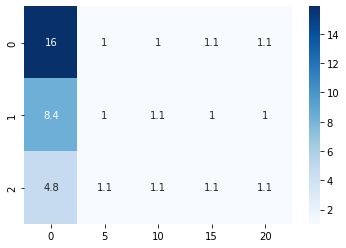

In [11]:
sns.heatmap(pd.DataFrame(mae_grid), annot=True, cmap="Blues");

In [27]:
model = ARIMA(y_train, order=(5, 0, 0)).fit()

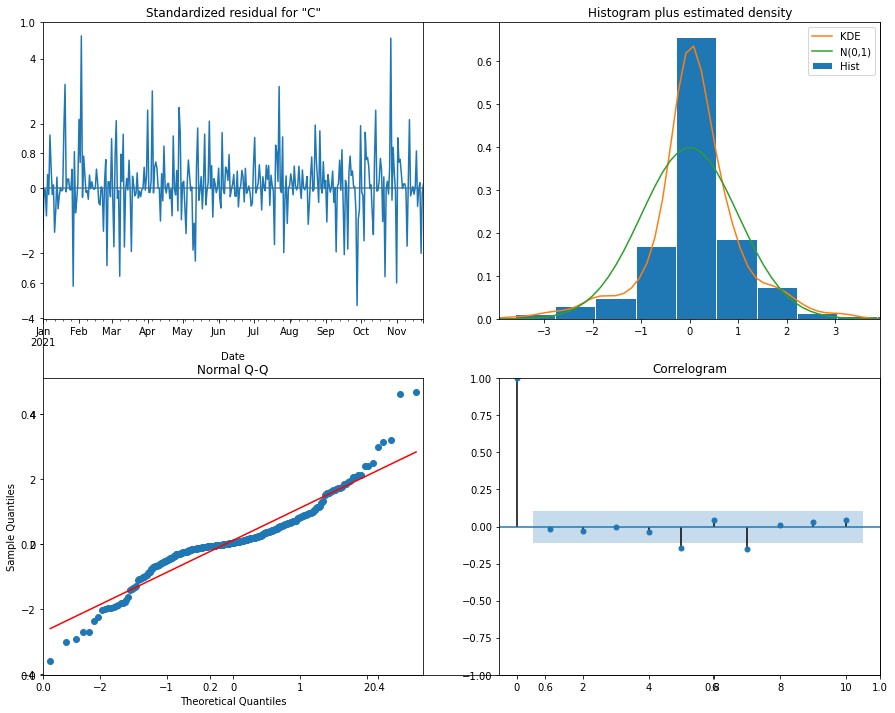

In [13]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

In [14]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history, order=(5, 0, 0)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    # print(next_pred.index)
    history = history.append(y_test[next_pred.index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [15]:
mean_absolute_error(y_test, y_pred_wfv)

1.2478236924415254

In [16]:
res_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_wfv})
res_df.index = res_df.index.to_timestamp()

In [17]:
fig = px.line(res_df, labels={"value": "Stock Price", "index": "Date"})
fig.show()

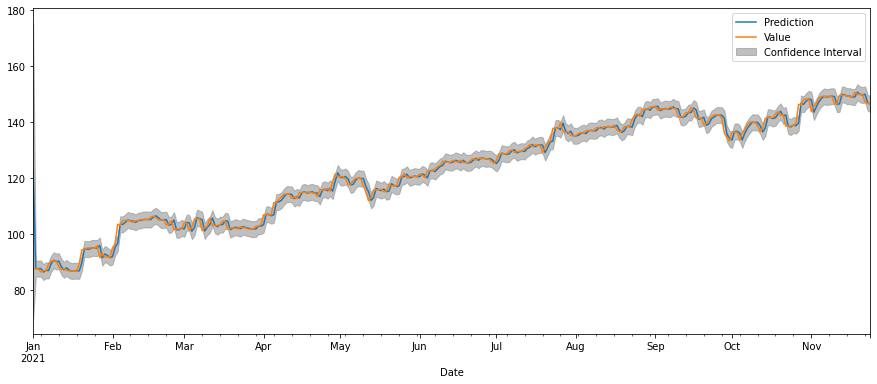

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
plot_predict(model, ax=ax)
plt.plot(y_train)
plt.legend(["Prediction", "Value", "Confidence Interval"]);